In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("no_pgn_data/data_1.csv")
df["TimeControl"]=df["TimeControl"].values.astype(str)

In [25]:
df.head()

,Result,WhiteElo,BlackElo,ECO,TimeControl,Termination,Evaluation
0,0.0,886,919,A00,60+0,Time forfeit,No
1,0.5,1723,1733,A00,60+0,Normal,No
2,0.0,1500,1270,A40,60+0,Normal,No
3,1.0,1347,1304,A40,60+0,Normal,No
4,1.0,1168,1159,C44,60+0,Normal,No


In [5]:
game_df = pd.DataFrame(columns = ['TimeControl', 'Count'])
column_list = ['TimeControl', 'Evaluation', 'Termination', 'Decisive']
sum_dict = {}
for i in range(0, 40):
    column_var = str(100 * i) + "-" + str(100*i + 100)
    column_list.append(column_var)
    sum_dict[column_var] = 'sum'

In [6]:
start = 1
end = 103 #103 
games_df = pd.DataFrame()
main_df = pd.DataFrame(columns = column_list)

while(start < end):
    path_name = "no_pgn_data/data_" + str(start) + ".csv"
    df = pd.read_csv(path_name)
    if(start != 1):
        df.drop(columns = ['ECO', 'TimeControl', 'Termination', 'Evaluation'], inplace = True)
        df.set_axis(['Result', 'WhiteElo', 'BlackElo', 'ECO', 'TimeControl', 'Termination', 'Evaluation'], axis = 1, inplace = True)
    games_df = df.groupby(["TimeControl"])['TimeControl'].count().to_frame()
    games_df = games_df.rename(columns = {"TimeControl":"Count"})
    games_df = games_df.rename_axis("TimeControl").reset_index()
    game_df = pd.concat([game_df, games_df]).groupby(['TimeControl'])['Count'].sum().to_frame()
    game_df = game_df.rename_axis("TimeControl").reset_index()

    df['WhiteElo'] = df['WhiteElo'] // 100 * 100
    df['BlackElo'] = df['WhiteElo'] // 100 * 100
    df.replace({'Result':{0.0 : 1, 0.5 : 0, 1.0 : 1}})
    df = df.rename(columns = {'Result':"Decisive"})
    cols = ['WhiteElo', 'BlackElo']
    df['ELO'] = [[e for e in row if e==e] for row in df[cols].values.tolist()]
    df = df.explode(['ELO'])
    df['ELO'] = df['ELO'].astype(str) + "-" + (df['ELO'] + 100).astype(str) 
    df = df.drop(columns = ['ECO', 'WhiteElo', 'BlackElo'])
    
    df = pd.get_dummies(df, prefix = '', prefix_sep = '', columns=['ELO']).groupby(['TimeControl',  'Evaluation', 'Termination', 'Decisive'], as_index=False).sum()
    for c in column_list:
        if c not in df.columns:
            df[c] = 0
    df = df[column_list]
    main_df = main_df.append(df)
    if(start == 1):
        temp_df = main_df
    if(start != 1):
        main_df = main_df.groupby(['TimeControl',  'Evaluation', 'Termination', 'Decisive']).agg(sum_dict).reset_index()

    start += 1

KeyboardInterrupt: 

In [ ]:
start = 1
end = 103 #103 
games_df = pd.DataFrame()
main_df = pd.DataFrame(columns = column_list)

while(start < end):
    path_name = "no_pgn_data/data_" + str(start) + ".csv"
    df = pd.read_csv(path_name)
    if(start != 1):
        df.drop(columns = ['ECO', 'TimeControl', 'Termination', 'Evaluation'], inplace = True)
        df.set_axis(['Result', 'WhiteElo', 'BlackElo', 'ECO', 'TimeControl', 'Termination', 'Evaluation'], axis = 1, inplace = True)
    games_df = df.groupby(["TimeControl"])['TimeControl'].count().to_frame()
    games_df = games_df.rename(columns = {"TimeControl":"Count"})
    games_df = games_df.rename_axis("TimeControl").reset_index()
    game_df = pd.concat([game_df, games_df]).groupby(['TimeControl'])['Count'].sum().to_frame()
    game_df = game_df.rename_axis("TimeControl").reset_index()
    
    df = df.replace({'Result':{0.0 : 1, 0.5 : 0, 1.0 : 1}})
    df = df.rename(columns = {'Result':"Decisive"})
    cols = ['WhiteElo', 'BlackElo']
    df['ELO'] = [[e for e in row if e==e] for row in df[cols].values.tolist()]
    df = df.explode(['ELO'])
    df = df.drop(columns = ["WhiteElo", "BlackElo", "ECO"])
    main_df = main_df.append(df)
    start += 1

In [113]:
main_df[main_df["TimeControl"] == "60+0"]

,TimeControl,Evaluation,Termination,Decisive,0-100,100-200,200-300,300-400,400-500,500-600,...,3000-3100,3100-3200,3200-3300,3300-3400,3400-3500,3500-3600,3600-3700,3700-3800,3800-3900,3900-4000
2032,60+0,No,Abandoned,0.0,0,0,0,0,0.0,2.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2033,60+0,No,Abandoned,1.0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2034,60+0,No,Normal,0.0,0,0,0,0,2.0,78.0,...,18.0,0.0,0.0,0,0,0,0,0,0,0
2035,60+0,No,Normal,0.5,0,0,0,0,0.0,2.0,...,6.0,0.0,0.0,0,0,0,0,0,0,0
2036,60+0,No,Normal,1.0,0,0,0,0,0.0,66.0,...,42.0,6.0,0.0,0,0,0,0,0,0,0
2037,60+0,No,Time forfeit,0.0,0,0,0,0,28.0,204.0,...,4.0,0.0,0.0,0,0,0,0,0,0,0
2038,60+0,No,Time forfeit,0.5,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2039,60+0,No,Time forfeit,1.0,0,0,0,0,10.0,152.0,...,18.0,0.0,0.0,0,0,0,0,0,0,0
2040,60+0,Yes,Normal,0.0,0,0,0,0,0.0,4.0,...,6.0,0.0,0.0,0,0,0,0,0,0,0
2041,60+0,Yes,Normal,0.5,0,0,0,0,0.0,0.0,...,4.0,2.0,0.0,0,0,0,0,0,0,0


In [112]:
temp_df[temp_df["TimeControl"] == "60+0"]

,TimeControl,Evaluation,Termination,Decisive,0-100,100-200,200-300,300-400,400-500,500-600,...,3000-3100,3100-3200,3200-3300,3300-3400,3400-3500,3500-3600,3600-3700,3700-3800,3800-3900,3900-4000
1571,60+0,No,Abandoned,0.0,0,0,0,0,0.0,2.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1572,60+0,No,Abandoned,1.0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1573,60+0,No,Normal,0.0,0,0,0,0,2.0,46.0,...,14.0,0.0,0,0,0,0,0,0,0,0
1574,60+0,No,Normal,0.5,0,0,0,0,0.0,0.0,...,4.0,0.0,0,0,0,0,0,0,0,0
1575,60+0,No,Normal,1.0,0,0,0,0,0.0,54.0,...,26.0,4.0,0,0,0,0,0,0,0,0
1576,60+0,No,Time forfeit,0.0,0,0,0,0,10.0,124.0,...,2.0,0.0,0,0,0,0,0,0,0,0
1577,60+0,No,Time forfeit,0.5,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1578,60+0,No,Time forfeit,1.0,0,0,0,0,6.0,76.0,...,10.0,0.0,0,0,0,0,0,0,0,0
1579,60+0,Yes,Normal,0.0,0,0,0,0,0.0,2.0,...,2.0,0.0,0,0,0,0,0,0,0,0
1580,60+0,Yes,Normal,0.5,0,0,0,0,0.0,0.0,...,0.0,2.0,0,0,0,0,0,0,0,0


In [101]:
game_df = game_df.sort_values(by='Count', ascending = False)
game_df

,TimeControl,Count
391,60+0,2649665
141,180+0,1878540
256,300+0,1454685
412,600+0,1096600
150,180+2,794655
...,...,...
193,2100+18,5
194,2100+180,5
309,3600+180,5
471,720+40,5


In [ ]:
game_df = game_df.sort_values(by='Count', ascending = False)
game_df.to_csv("game_counts2.csv")
main_df.to_csv("main_counts2.csv")

In [132]:
count_TimeControl = df.groupby(['TimeControl'])['TimeControl'].count()
count_TimeControl = count_TimeControl.sort_values(ascending = False)
count_TimeControl /= count_TimeControl.sum()
count_TimeControl = count_TimeControl.to_frame()
count_TimeControl.index.name = 'times'
count_TimeControl.reset_index(inplace=True)
count_TimeControl.columns = ["Time Control", "Counts"]
count_TimeControl = count_TimeControl[:10]
print(type(count_TimeControl))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='Time Control', ylabel='Counts'>

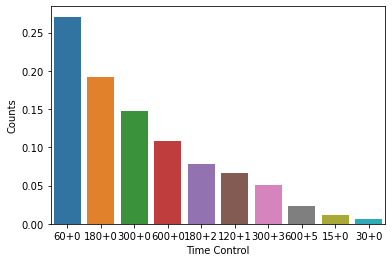

In [133]:
sns.barplot(data = count_TimeControl, x = "Time Control", y = "Counts")

In [1]:
def Remove_Output(Book):
    for cell in Book.cells:
        if hasattr(cell, "outputs"):
            cell.outputs = []
        if hasattr(cell, "prompt_number"):
            del cell["prompt_number"]

Book= read(open("Create.ipynb"), 4)
Remove_Output(Book)
write(Book, open("Create_csv.ipynb", "w"), 4)

NameError: name 'read' is not defined